In [2]:
!pip install mlxtend
!pip install transformers
!pip install gensim
!pip install plotly

In [2]:
#pip install matplotlib --force-reinstall

In [3]:
#conda install freetype --force-reinstall

In [4]:
#!pip uninstall matplotlib

In [5]:
#!pip install matplotlib

In [6]:
#!pip uninstall yellowbrick

In [4]:
! pip install yellowbrick

In [233]:
import math
import re
import nltk
nltk.download('stopwords')
nltk.download('gutenberg')
import csv
from sklearn.mixture import GaussianMixture
from gensim.models.coherencemodel import CoherenceModel
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from nltk.tokenize import word_tokenize
from csv import writer
from nltk.corpus import gutenberg, stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
#from keras.layers import LSTM
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import transformers as ppb
from sklearn.metrics import plot_confusion_matrix
#from sklearn.svm import LSSVC
# from mlxtend.evaluate import bias_variance_decomp
import random
import pandas as pd
nltk.download('wordnet')
from nltk.tokenize import regexp_tokenize
en_stops = set(stopwords.words('english'))
name_book=nltk.corpus.gutenberg.fileids()
from nltk.stem import WordNetLemmatizer 
from urllib import request
import numpy as np
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA # Needed for dimension reduction
from sklearn.preprocessing import StandardScaler
from yellowbrick.text import TSNEVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import homogeneity_score
from sklearn.metrics.pairwise import euclidean_distances





C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nada\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Nada\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nada\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
def prepare_data(name,label):
    #lines=(nltk.corpus.gutenberg.raw(name)).lower() # get words of book 
    response = request.urlopen(name)
    lines = (response.read().decode('utf8')).lower()
    #print(lines)
    book_words= regexp_tokenize(lines,r'([a-zA-Z]{2,})[\,|\s|\.]') # remove #@%^&*? from words 
    file=[]
    book_data=[]
    for w in book_words: # remove stop words 
        if w not in en_stops:
            file.append(w)
    lemmatizer = WordNetLemmatizer()
    lemmatized_output=[]
    lemmatized_output = [lemmatizer.lemmatize(w) for w in file]
    #print( lemmatized_output)
    book=[]
    for i in range(250): # divide book to 400 partations 
        
        book.append(file[i*150:(i+1)*150]) # all samples have 150 words
        book_data.append(' '.join(book[i]))
    df = pd.DataFrame({"partitions":book_data})
    df[1]=label # give every partations label with book name 
    dataframe= pd.DataFrame()
    dataframe= df.sample(n=200,random_state=0)
    
    return dataframe

In [184]:
url = ["https://www.gutenberg.org/files/3268/3268-0.txt"
,"https://www.gutenberg.org/files/25525/25525-0.txt"
,"https://www.gutenberg.org/files/1727/1727-0.txt"
,"https://www.gutenberg.org/files/829/829-0.txt"
,"https://www.gutenberg.org/cache/epub/24159/pg24159.txt"]

label=[0,1,2,3,4]

C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [185]:
data =pd.DataFrame()
for i in range(5):
    
    data=data.append(prepare_data(url[i],label[i]))
data = data.rename(columns={1: 'Author'})



C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,partitions,Author
225,pursuing way overhanging heights considered ti...,0
122,almost hid view selfishness security touches m...,0
92,children dancing green yonder merry long may h...,0
157,imperfect light would suffer judge degree cert...,0
154,selected favourite authors put clothes shed ma...,0
...,...,...
183,could hardly believe sense hearing impudent sh...,4
114,cloath napkins cloath others holland tableclot...,4
163,object great pride even veneration owner fancy...,4
151,hand hand drunk without intervening glasses cr...,4


In [186]:
dat= data.sample(frac=1).reset_index(drop=True)
dat

C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,partitions,Author
0,license whereby secretaries state got consider...,3
1,alcinous give stranger satisfaction require sh...,2
2,extreme surprise evidently astonished weight l...,1
3,found vicinity supposed scene outrage phial la...,1
4,brought magnificent demonstration arose puttin...,1
...,...,...
995,ordination bill read renderings accounts think...,4
996,case thence miniature picture rays light fell ...,0
997,bates master encouraged recommended several pa...,3
998,red black yellow upon whole never beheld trave...,3


In [187]:
#BOW
bow_vec = CountVectorizer(max_features=1000)
bow = bow_vec.fit_transform(data["partitions"])
BOW=bow.todense()


df_BOW = pd.DataFrame(bow.toarray(),columns =[i for i in bow_vec.get_feature_names() ] )
df_BOW


C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,able,accident,account,achaeans,added,admiration,affairs,afterwards,age,air,...,would,writing,written,wrote,yards,year,years,yet,young,youth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
997,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [188]:
#TF_IDF
tfidf_vec = TfidfVectorizer()
tfidf = tfidf_vec.fit_transform(data["partitions"])
TFIDF=tfidf.todense()


df_tfidf = pd.DataFrame(tfidf.toarray(),columns=tfidf_vec.get_feature_names())
df_tfidf


C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,aaraaf,ab,abandon,abandoned,abandoning,abandonment,abase,abased,abashed,abate,...,zest,zethus,zeus,zigzag,zion,zodiac,zodiacal,zone,zufalle,zusammen
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [229]:
#....................................................................
# First calculete average  square between Centroide and his point 
# sconed calculate averge between 5 cluster 
# thired calculate average sequre between ectch centroide
# calculate average between the average sequre between ectch centroide
# divide  average square distance between centroides to  
# average square distance between each point to his centroide 
#..................................................................
def Consistency (model, feature ):
    average_point_klu=[]
    for i in range(5):
        average_point_klu.append(sum(euclidean_distances(feature[i*200:(i+1)*200],[model.cluster_centers_[i]]))/200)
    sum(average_point_klu)
    dists = euclidean_distances(model.cluster_centers_)
    return np.sum((np.sum(dists,axis=1)))/sum(average_point_klu)

C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [230]:
# calculate consistency for AgglomerativeClustering by usin attribute children_ 

def consitancy_AgglomerativeClustering(model , feature):
    
    list=[]
    for i in range(5):
        list.append(sum(model.children_[200*i:(i+1)*200])/200)

    average_point_klu=[]
    for i in range(5):
            average_point_klu.append(sum(euclidean_distances(feature[i*200:(i+1)*200],[list[i]]))/200)
    sum(average_point_klu)
    dists = euclidean_distances(list)
    return np.sum((np.sum(dists,axis=1)))/sum(average_point_klu)

C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [231]:
# calculate consistency for GaussianMixtur by usin attribute mean_ 
def Consistency_GaussianMixtur (model, feature ):
    average_point_klu=[]
    for i in range(5):
        average_point_klu.append(sum(euclidean_distances(feature[i*200:(i+1)*200],[model.means_[i]]))/200)
    sum(average_point_klu)
    dists = euclidean_distances(model.means_)
    return np.sum((np.sum(dists,axis=1)))/sum(average_point_klu)

C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The average silhouette_score is : 0.5812230386790173
The average silhouette_score is : 0.7191951457087378
The average silhouette_score is : 0.6618302897371404
The average silhouette_score is : 0.6283756401707119
The average silhouette_score is : 0.41576908893424114
The average silhouette_score is : 0.4085579907175918
The average silhouette_score is : 0.3936895959213705
The average silhouette_score is : 0.3814390433799677
The average silhouette_score is : 0.36850574953447984


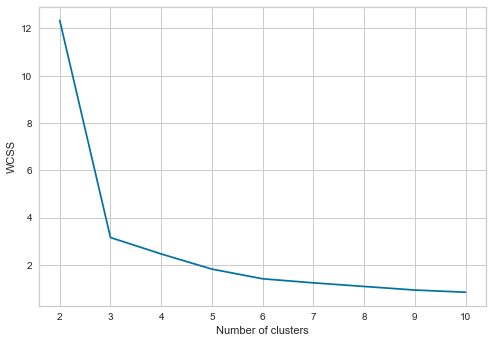

In [189]:

pca = PCA(n_components=2)
pca.fit(np.array(TFIDF))
dff=pca.transform(np.array(TFIDF))


wcss = []
for i in range(2,11):
   model = KMeans(n_clusters=i, init='k-means++',random_state=0)
   #model.fit(BOW_vectors)
   ypred=model.fit_predict(dff)
   wcss.append(model.inertia_)
   centroids, model_labels = model.cluster_centers_, model.labels_
   silhouette_avg = silhouette_score(dff,ypred,metric='euclidean')
   print("The average silhouette_score is :", silhouette_avg)
#plt.figure(figsize=(10,10))
plt.plot(range(2,11), wcss,scalex=True, scaley=True)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()







C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


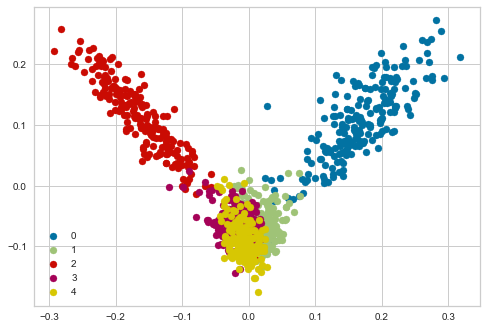

In [275]:
# Import libraries
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=2)
pca.fit(np.array(TFIDF))
dff=pca.transform(np.array(TFIDF))

#Getting unique labels
 
u_labels = np.unique(data["Author"])
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(dff[data["Author"] == i , 0] , dff[data["Author"] == i , 1] , label = i)

plt.legend()
plt.show()








C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* arg

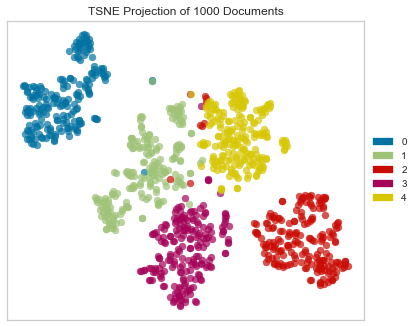

<AxesSubplot:title={'center':'TSNE Projection of 1000 Documents'}>

In [191]:
# print(feature.shape)
tsne = TSNEVisualizer()
tsne.fit(TFIDF,data["Author"])
tsne.show()




In [192]:

my_data=[]
for i in range(1000):
    a=data.iloc[i,0]
    my_data.append(a.split())
    
print(my_data)



[['pursuing', 'way', 'overhanging', 'heights', 'considered', 'time', 'distance', 'separate', 'every', 'step', 'took', 'lengthened', 'distance', 'heart', 'sunk', 'surrounding', 'landscape', 'charmed', 'travellers', 'passing', 'novalesa', 'reached', 'evening', 'closed', 'small', 'ancient', 'town', 'susa', 'formerly', 'guarded', 'pass', 'alps', 'piedmont', 'heights', 'command', 'since', 'invention', 'artillery', 'rendered', 'fortifications', 'romantic', 'heights', 'seen', 'moonlight', 'town', 'surrounded', 'walls', 'watchtowers', 'partially', 'illumined', 'exhibited', 'interesting', 'picture', 'emily', 'rested', 'night', 'inn', 'little', 'accommodation', 'boast', 'travellers', 'brought', 'hunger', 'gives', 'delicious', 'flavour', 'coarsest', 'viands', 'weariness', 'ensures', 'emily', 'first', 'caught', 'strain', 'italian', 'music', 'italian', 'ground', 'sat', 'supper', 'little', 'window', 'opened', 'upon', 'country', 'observing', 'effect', 'moonlight', 'broken', 'surface', 'mountains', 'r

C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
!pip install pyLDAvis

In [290]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora
import gensim
from gensim.utils import simple_preprocess

import pyLDAvis
from pprint import pprint



id2word = corpora.Dictionary(my_data)
texts = my_data
corpus = [id2word.doc2bow(text) for text in texts]
#print(corpus[:1])
# Human readable format of corpus (term-frequency)
read=[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]
#print(read)
lda_model = LdaModel(corpus=corpus,
                    id2word=id2word,
                    num_topics=5, 
                    random_state=100,
                    update_every=1,
                    chunksize=100,
                    passes=10,
                    alpha='auto',
                    per_word_topics=True)

#Print the Keyword in the 5 topics
# print(lda_model.print_topics())
# doc_lda = lda_model[corpus]
    
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=my_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=id2word)
vis



C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '0.008*"upon" + 0.008*"two" + 0.008*"one" + 0.006*"would" + 0.006*"made" + 0.006*"great" + 0.005*"three" + 0.005*"could" + 0.005*"found" + 0.005*"little"'), (1, '0.006*"land" + 0.005*"narragansett" + 0.004*"water" + 0.004*"sheep" + 0.003*"sun" + 0.003*"hair" + 0.003*"breed" + 0.003*"sea" + 0.003*"wild" + 0.003*"rocks"'), (2, '0.009*"one" + 0.008*"said" + 0.007*"would" + 0.006*"could" + 0.006*"good" + 0.005*"house" + 0.005*"made" + 0.005*"came" + 0.005*"upon" + 0.005*"much"'), (3, '0.008*"feet" + 0.007*"could" + 0.004*"three" + 0.004*"upon" + 0.004*"yards" + 0.004*"half" + 0.004*"box" + 0.004*"horse" + 0.003*"island" + 0.003*"noise"'), (4, '0.020*"new" + 0.015*"england" + 0.010*"boston" + 0.006*"book" + 0.006*"also" + 0.006*"early" + 0.004*"books" + 0.004*"old" + 0.004*"century" + 0.004*"puritan"')]

Perplexity:  -8.649216873407363

Coherence Score:  0.4171415602407221


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.196348  0.093195       1        1  51.630890
0     -0.163597  0.052323       2        1  26.673424
4      0.255488  0.173990       3        1   9.918996
3     -0.007449 -0.152162       4        1   6.870462
1      0.111906 -0.167346       5        1   4.906228, topic_info=           Term        Freq       Total Category  logprob  loglift
962         new  360.000000  360.000000  Default  30.0000  30.0000
6484    england  264.000000  264.000000  Default  29.0000  29.0000
16        could  743.000000  743.000000  Default  28.0000  28.0000
91         said  611.000000  611.000000  Default  27.0000  27.0000
8120     boston  156.000000  156.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
1360       fire   17.032507  106.908955   Topic5  -6.0686   1.1778
428       trees   14.830997   46.949843   Topic5  -6.2070   1.8623
280       green   14.558052   55.917717   Topic5  -6.2256   1.6689
319   sometimes   15.831997  133.967037   Topic5  -6.1417   0.8791
214       round   14.039052  137.022112   Topic5  -6.2619   0.7364

[345 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
2117       1  0.190897     account
2117       2  0.798298     account
14526      3  0.991147  advertised
1676       2  0.986387     affairs
1298       1  0.743110       along
...      ...       ...         ...
4126       2  0.122288        year
4126       3  0.511384        year
840        1  0.267531       years
840        2  0.505336       years
840        3  0.227897       years

[523 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 5, 4, 2])

C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


book0 to label 2
book1 to label 4
book2 to label 1
book3 to label 0
book4 to label 3
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2
 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 0 4 4 3 3 3 0 4 4 4 4 3 3 4 4 4 0 4 3 3 4
 4 3 3 3 4 4 3 3 4 4 3 3 4 0 4 4 3 3 0 0 3 4 4 3 3 4 3 4 3 4 4 4 4 3 3 0 3
 4 3 4 3 4 4 4 4 4 4 4 4 4 0 4 3 3 0 3 0 4 0 0 4 0 3 3 4 0 0 4 0 3 4 3 4 4
 0 0 0 0 3 4 4 4 4 3 4 3 2 0 4 4 3 3 4 3 3 3 3 3 4 4 4 4 3 0 4 4 0 4 4 0 4
 4 0 4 4 4 3 4 0 3 4 3 3 4 4 4 4 4 0 0 4 4 3 0 4 3 3 4 4 3 3 4 3 3 3 3 4 4
 4 0 3 0 3 0 4 4 3 2 4 3 4 3 4 3 4 4 3 4 3 4 0 0 3 0 3 3 3 4 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 

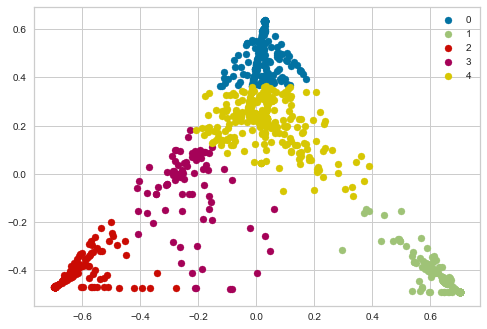

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

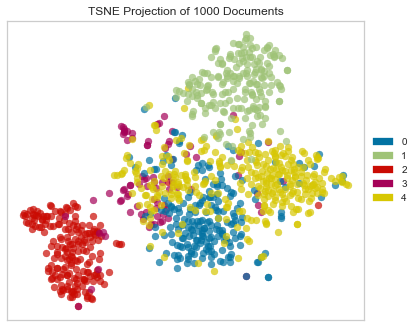

<AxesSubplot:title={'center':'TSNE Projection of 1000 Documents'}>

In [295]:
#kmeans with bow
lda = LatentDirichletAllocation(n_components=6,random_state=0) 
LDA_out= lda.fit_transform(np.array(BOW))
pca = PCA(n_components=2)
pca.fit(LDA_out)
dff=pca.transform(LDA_out)
model =KMeans(n_clusters=5, init='k-means++',random_state=0)
ypred=model.fit_predict(dff)
#list=[3,0,1,4,2]
list=[2,4,1,0,3]


y=[]
for i in range(1000):
    if np.array(data["Author"])[i] ==0:
        y.append(list[0])
    elif np.array(data["Author"])[i] ==1:
         y.append(list[1])
    elif np.array(data["Author"])[i] ==2:
         y.append(list[2])
         
    elif np.array(data["Author"])[i] ==3:
        y.append(list[3])
    else :
        y.append(list[4])
for i in range(5):
    print(f"book{i} to label {list[i]}")
print(ypred)
silhouette_avg = silhouette_score(dff,ypred,metric='euclidean')
print("The average silhouette_score is :", silhouette_avg)
print("Homogeneity score :" , homogeneity_score(np.array(y), ypred))
cohen_kappa=cohen_kappa_score(np.array(y), ypred)
print("Kappa is :", cohen_kappa)
print("The Average consitence is :", Consistency (model, dff)[0])

count_book0=0
count_book1=0
count_book2=0
count_book3=0
count_book4=0
#list=[3,2,4,0,1]
for i in range(1000):
    if y[i]== ypred[i]:
        if y[i]==0:
            count_book2=count_book2+1
        elif y[i]==1:
            count_book4=count_book4+1
        elif y[i]==2:
            count_book1=count_book1+1
        elif y[i]==3:
            count_book0=count_book0+1
        else:
            count_book3=count_book3+1
print(f"The precentage of correct  book 0: {count_book0/200}\n The precentage of correct  book1: {count_book1/200}\n The precentage of correct  book2: {count_book2/200}\n The precentage of correct  book3: {count_book3/200}\n The precentage of correct  book4: {count_book4/200}\n  ")
#Getting unique labels

#Getting unique labels
u_labels = np.unique(ypred)
#plotting the results:
 
for i in u_labels:
    plt.scatter(dff[ypred == i , 0] , dff[ypred == i , 1] , label = i)
plt.legend()
plt.show()
      
tsne = TSNEVisualizer()
tsne.fit(np.array(BOW),ypred)
tsne.show()



C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


book0 to label 2
book1 to label 1
book2 to label 4
book3 to label 0
book4 to label 3
The average silhouette_score is : 0.010839252802022446
Homogeneity score : 0.7022349819687601
Kappa is : 0.65625
The Average consitence is : 1.2489782785735848
The precentage of correct  book 0: 0.985
 The precentage of correct  book1: 0.0
 The precentage of correct  book2: 0.95
 The precentage of correct  book3: 0.965
 The precentage of correct  book4: 0.725
  


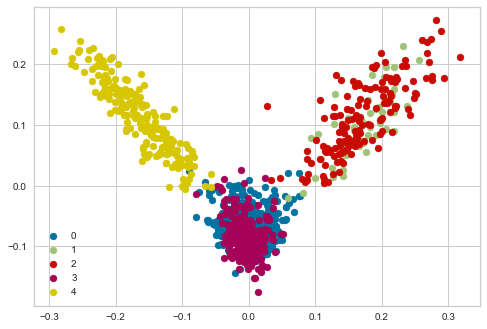

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

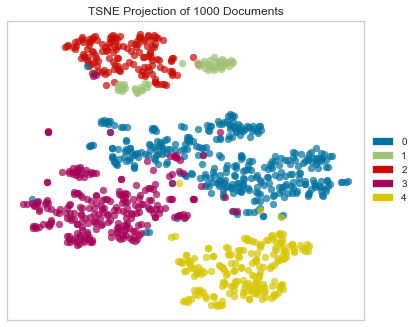

<AxesSubplot:title={'center':'TSNE Projection of 1000 Documents'}>

In [296]:
# kmeans with tfidf 
model =KMeans(n_clusters=5, init='k-means++',random_state=0)
pca=PCA(2)
dff=pca.fit_transform(np.array(TFIDF))

ypred=model.fit_predict(np.array(TFIDF))
#list=[1,2,4,0,3]
# list=[3,0,4,1,2]
list=[2,1,4,0,3]

y=[]
for i in range(1000):
    if np.array(data["Author"])[i] ==0:
        y.append(list[0])
    elif np.array(data["Author"])[i] ==1:
         y.append(list[1])
    elif np.array(data["Author"])[i] ==2:
         y.append(list[2])
         
    elif np.array(data["Author"])[i] ==3:
        y.append(list[3])
    else :
        y.append(list[4])
#print(ypred)
for i in range(5):
    print(f"book{i} to label {list[i]}")
silhouette_avg = silhouette_score(np.array(TFIDF),ypred,metric='euclidean')
print("The average silhouette_score is :", silhouette_avg)
print("Homogeneity score :" , homogeneity_score(np.array(y), ypred))
cohen_kappa=cohen_kappa_score(np.array(y), ypred)
print("Kappa is :", cohen_kappa)
print("The Average consitence is :", Consistency (model, np.array(TFIDF))[0])

count_book0=0
count_book1=0
count_book2=0
count_book3=0
count_book4=0
#list=[3,2,4,0,1]
for i in range(1000):
    if y[i]== ypred[i]:
        if y[i]==0:
            count_book2=count_book2+1
        elif y[i]==1:
            count_book1=count_book1+1
        elif y[i]==2:
            count_book4=count_book4+1
        elif y[i]==3:
            count_book0=count_book0+1
        else:
            count_book3=count_book3+1
print(f"The precentage of correct  book 0: {count_book0/200}\n The precentage of correct  book1: {count_book1/200}\n The precentage of correct  book2: {count_book2/200}\n The precentage of correct  book3: {count_book3/200}\n The precentage of correct  book4: {count_book4/200}\n  ")
#Getting unique labels
#Getting unique labels
 
u_labels = np.unique(ypred)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(dff[ypred == i , 0] , dff[ypred == i , 1] , label = i)
plt.legend()
plt.show()
    
tsne = TSNEVisualizer()
tsne.fit(np.array(TFIDF),ypred)
tsne.show()       
        


C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


book0 to label 2
book1 to label 4
book2 to label 0
book3 to label 3
book4 to label 1
The average silhouette_score is : 0.5898219603049875
Homogeneity score : 0.6162422884654881
Kappa is : 0.725
The Average consitence is : 1.877452544098291
The precentage of correct  book 0: 0.985
 The precentage of correct  book1: 0.4
 The precentage of correct  book2: 0.97
 The precentage of correct  book3: 0.735
 The precentage of correct  book4: 0.81
  


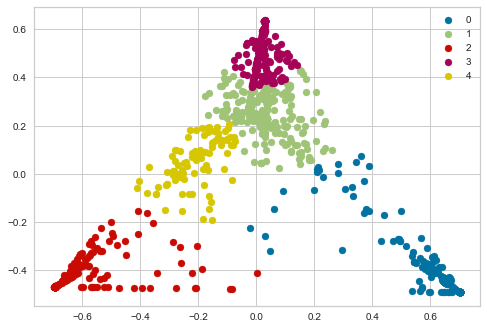

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

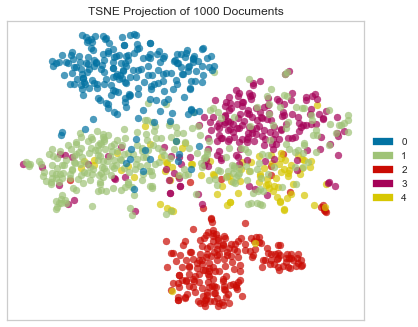

<AxesSubplot:title={'center':'TSNE Projection of 1000 Documents'}>

In [297]:
lda = LatentDirichletAllocation(n_components=6,random_state=0) 
LDA_out= lda.fit_transform(np.array(BOW))
pca = PCA(n_components=2)
pca.fit(LDA_out)
dff=pca.transform(LDA_out)
model =AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
ypred=model.fit_predict(dff)
#list=[4,3,0,2,1]
# list=[1,3,0,4,2]
list=[2,4,0,3,1]
y=[]
for i in range(1000):
    if np.array(data["Author"])[i] ==0:
        y.append(list[0])
    elif np.array(data["Author"])[i] ==1:
         y.append(list[1])
    elif np.array(data["Author"])[i] ==2:
         y.append(list[2])
         
    elif np.array(data["Author"])[i] ==3:
        y.append(list[3])
    else :
        y.append(list[4])
#print(ypred)
for i in range(5):
    print(f"book{i} to label {list[i]}")
silhouette_avg = silhouette_score(dff,ypred,metric='euclidean')
print("The average silhouette_score is :", silhouette_avg)
print("Homogeneity score :" , homogeneity_score(np.array(y), ypred))
cohen_kappa=cohen_kappa_score(np.array(y), ypred)
print("Kappa is :", cohen_kappa)
print("The Average consitence is :", consitancy_AgglomerativeClustering(model , dff)[0])

count_book0=0
count_book1=0
count_book2=0
count_book3=0
count_book4=0
#list=[3,2,4,0,1]
for i in range(1000):
    if y[i]== ypred[i]:
        if y[i]==0:
            count_book2=count_book2+1
        elif y[i]==1:
            count_book4=count_book4+1
        elif y[i]==2:
            count_book0=count_book0+1
        elif y[i]==3:
            count_book3=count_book3+1
        else:
            count_book1=count_book1+1
print(f"The precentage of correct  book 0: {count_book0/200}\n The precentage of correct  book1: {count_book1/200}\n The precentage of correct  book2: {count_book2/200}\n The precentage of correct  book3: {count_book3/200}\n The precentage of correct  book4: {count_book4/200}\n  ")
#Getting unique labels
#Getting unique labels
 
u_labels = np.unique(ypred)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(dff[ypred == i , 0] , dff[ypred == i , 1] , label = i)
plt.legend()
plt.show()
    
    
tsne = TSNEVisualizer()
tsne.fit(np.array(BOW),ypred)
tsne.show()


C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 1 3 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 0 4 4 4 4 4 1 4 4 4 4 0 4 4 4 4 4 1 0 4 4 4 4 4 4 1 4 4 1 0 0 4 0 4 4 4
 4 4 1 4 4 4 4 1 4 1 4 4 4 1 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 0 0 4 0 4 4 4 4
 4 1 4 4 1 4 4 4 0 4 4 0 0 1 4 4 4 4 4 4 4 0 1 4 4 4 4 4 4 4 1 4 4 4 4 4 4
 3 4 4 4 4 0 4 4 4 2 4 4 4 4 4 4 1 4 4 4 4 4 4 1 4 4 4 4 0 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4
 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

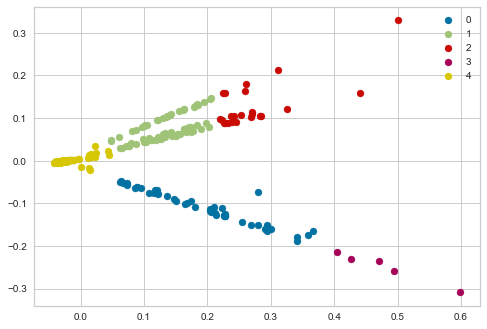

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

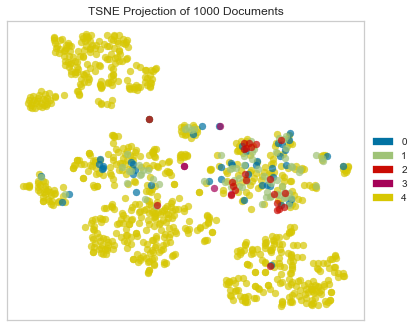

<AxesSubplot:title={'center':'TSNE Projection of 1000 Documents'}>

In [298]:
lda = LatentDirichletAllocation(n_components=6,random_state=0) 
LDA_out= lda.fit_transform(np.array(TFIDF))
pca = PCA(n_components=2)
pca.fit(LDA_out)
dff=pca.transform(LDA_out)
model =AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
ypred=model.fit_predict(dff)
#list=[3,2,4,1,0]
#list=[2,3,1,0,4]
list=[4,0,1,3,2]
y=[]
for i in range(1000):
    if np.array(data["Author"])[i] ==0:
        y.append(list[0])
    elif np.array(data["Author"])[i] ==1:
         y.append(list[1])
    elif np.array(data["Author"])[i] ==2:
         y.append(list[2])
         
    elif np.array(data["Author"])[i] ==3:
        y.append(list[3])
    else :
        y.append(list[4])
print(ypred)
for i in range(5):
    print(f"book{i} to label {list[i]}")
silhouette_avg = silhouette_score(dff,ypred,metric='euclidean')
print("The average silhouette_score is :", silhouette_avg)
print("Homogeneity score :" , homogeneity_score(np.array(y), ypred))
cohen_kappa=cohen_kappa_score(np.array(y), ypred)
print("Kappa is :", cohen_kappa)
print("The Average consitence is :", consitancy_AgglomerativeClustering(model , dff)[0])
count_book0=0
count_book1=0
count_book2=0
count_book3=0
count_book4=0
#list=[3,2,4,0,1]
for i in range(1000):
    if y[i]== ypred[i]:
        if y[i]==0:
            count_book4=count_book4+1
        elif y[i]==1:
            count_book0=count_book0+1
        elif y[i]==2:
            count_book1=count_book1+1
        elif y[i]==3:
            count_book3=count_book3+1
        else:
            count_book2=count_book2+1
print(f"The precentage of correct  book 0: {count_book0/200}\n The precentage of correct  book1: {count_book1/200}\n The precentage of correct  book2: {count_book2/200}\n The precentage of correct  book3: {count_book3/200}\n The precentage of correct  book4: {count_book4/200}\n  ")
#Getting unique labels
#Getting unique labels
 
u_labels = np.unique(ypred)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(dff[ypred == i , 0] , dff[ypred == i , 1] , label = i)
plt.legend()
plt.show()
    
    
tsne = TSNEVisualizer()
tsne.fit(np.array(TFIDF),ypred)
tsne.show()


C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


book0 to label 2
book1 to label 1
book2 to label 4
book3 to label 0
book4 to label 3
The average silhouette_score is : 0.5176235663734403
Homogeneity score : 0.563842811034583
Kappa is : 0.595
The Average consitence is : 4.409580782858987
The precentage of correct  book 0: 0.845
 The precentage of correct  book1: 0.405
 The precentage of correct  book2: 0.445
 The precentage of correct  book3: 0.905
 The precentage of correct  book4: 0.78
  


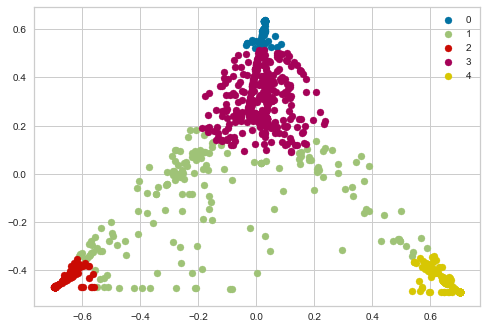

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

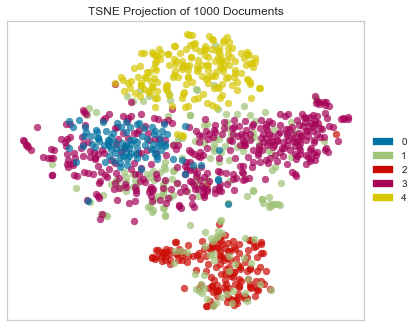

<AxesSubplot:title={'center':'TSNE Projection of 1000 Documents'}>

In [299]:
lda = LatentDirichletAllocation(n_components=6,random_state=0) 
LDA_out= lda.fit_transform(np.array(BOW))
pca = PCA(n_components=2)
pca.fit(LDA_out)
dff=pca.transform(LDA_out)
model =GaussianMixture(n_components=5, covariance_type='spherical', random_state=0)
ypred=model.fit_predict(dff)
#list=[0,3,4,2,1]
#list=[3,0,4,1,2]
list=[2,1,4,0,3]
y=[]
for i in range(1000):
    if np.array(data["Author"])[i] ==0:
        y.append(list[0])
    elif np.array(data["Author"])[i] ==1:
         y.append(list[1])
    elif np.array(data["Author"])[i] ==2:
         y.append(list[2])
         
    elif np.array(data["Author"])[i] ==3:
        y.append(list[3])
    else :
        y.append(list[4])
#print(ypred)
for i in range(5):
    print(f"book{i} to label {list[i]}")
silhouette_avg = silhouette_score(dff,ypred,metric='euclidean')
print("The average silhouette_score is :", silhouette_avg)
print("Homogeneity score :" , homogeneity_score(np.array(y), ypred))
cohen_kappa=cohen_kappa_score(np.array(y), ypred)
print("Kappa is :", cohen_kappa)
print("The Average consitence is :", Consistency_GaussianMixtur(model , dff)[0])
count_book0=0
count_book1=0
count_book2=0
count_book3=0
count_book4=0
#list=[3,2,4,0,1]
for i in range(1000):
    if y[i]== ypred[i]:
        if y[i]==0:
            count_book2=count_book2+1
        elif y[i]==1:
            count_book1=count_book1+1
        elif y[i]==2:
            count_book4=count_book4+1
        elif y[i]==3:
            count_book0=count_book0+1
        else:
            count_book3=count_book3+1
print(f"The precentage of correct  book 0: {count_book0/200}\n The precentage of correct  book1: {count_book1/200}\n The precentage of correct  book2: {count_book2/200}\n The precentage of correct  book3: {count_book3/200}\n The precentage of correct  book4: {count_book4/200}\n  ")

#Getting unique labels
 
u_labels = np.unique(ypred)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(dff[ypred == i , 0] , dff[ypred == i , 1] , label = i)
plt.legend()
plt.show()
    
    
tsne = TSNEVisualizer()
tsne.fit(np.array(BOW),ypred)
tsne.show()


C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


book0 to label 3
book1 to label 2
book2 to label 4
book3 to label 0
book4 to label 1
The average silhouette_score is : 0.012631195348626318
Homogeneity score : 0.8625703810765937
Kappa is : 0.93375
The Average consitence is : 1.0558165355216484
The precentage of correct  book 0: 0.945
 The precentage of correct  book1: 0.99
 The precentage of correct  book2: 0.99
 The precentage of correct  book3: 0.95
 The precentage of correct  book4: 0.86
  


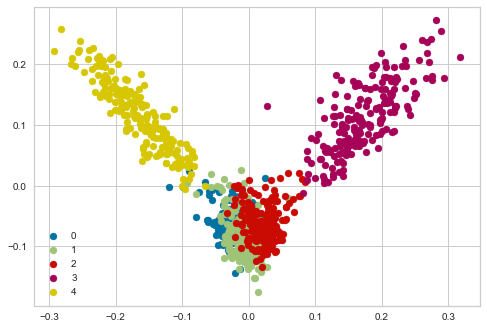

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

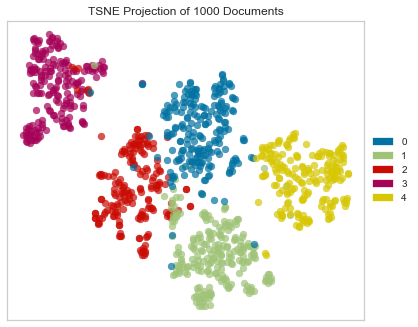

<AxesSubplot:title={'center':'TSNE Projection of 1000 Documents'}>

In [303]:
lda = LatentDirichletAllocation(n_components=6,random_state=0) 

LDA_out= lda.fit_transform(np.array(TFIDF))
pca = PCA(n_components=2)
pca.fit(np.array(TFIDF))
dff=pca.transform(np.array(TFIDF))
model =GaussianMixture(n_components=5, covariance_type='spherical', random_state=0)
ypred=model.fit_predict(np.array(TFIDF))
#list=[3,0,1,2,4]
list=[3,2,4,0,1]
y=[]
for i in range(1000):
    if np.array(data["Author"])[i] ==0:
        y.append(list[0])
    elif np.array(data["Author"])[i] ==1:
         y.append(list[1])
    elif np.array(data["Author"])[i] ==2:
         y.append(list[2])
         
    elif np.array(data["Author"])[i] ==3:
        y.append(list[3])
    else :
        y.append(list[4])
#print(ypred)
for i in range(5):
    print(f"book{i} to label {list[i]}")
silhouette_avg = silhouette_score(np.array(TFIDF),ypred,metric='euclidean')
print("The average silhouette_score is :", silhouette_avg)
print("Homogeneity score :" , homogeneity_score(np.array(y), ypred))
cohen_kappa=cohen_kappa_score(np.array(y), ypred)
print("Kappa is :", cohen_kappa)
print("The Average consitence is :", Consistency_GaussianMixtur(model , np.array(TFIDF))[0])
#print(f" book0: {count_book0}\n book1: {count_book1}\n book2: {count_book2}\n book3: {count_book3}\n book4: {count_book4}\n  "

count_book0=0
count_book1=0
count_book2=0
count_book3=0
count_book4=0
#list=[3,2,4,0,1]
for i in range(1000):
    if y[i]== ypred[i]:
        if y[i]==0:
            count_book2=count_book2+1
        elif y[i]==1:
            count_book1=count_book1+1
        elif y[i]==2:
            count_book4=count_book4+1
        elif y[i]==3:
            count_book0=count_book0+1
        else:
            count_book3=count_book3+1
print(f"The precentage of correct  book 0: {count_book0/200}\n The precentage of correct  book1: {count_book1/200}\n The precentage of correct  book2: {count_book2/200}\n The precentage of correct  book3: {count_book3/200}\n The precentage of correct  book4: {count_book4/200}\n  ")

#Getting unique labels
 
u_labels = np.unique(ypred)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(dff[ypred == i , 0] , dff[ypred == i , 1] , label = i)
plt.legend()
plt.show()
    
    
tsne = TSNEVisualizer()
tsne.fit(np.array(TFIDF),ypred)
tsne.show()


In [294]:
lda = LatentDirichletAllocation(n_components=6,random_state=0) 
LDA_out= lda.fit_transform(np.array(BOW))
pca = PCA(n_components=2)
pca.fit(LDA_out)
dff=pca.transform(LDA_out)
model =AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
ypred=model.fit_predict(dff)
list=[4,3,0,2,1]
y=[]
for i in range(1000):
    if np.array(data["Author"])[i] ==0:
        y.append(list[0])
    elif np.array(data["Author"])[i] ==1:
         y.append(list[1])
    elif np.array(data["Author"])[i] ==2:
         y.append(list[2])
         
    elif np.array(data["Author"])[i] ==3:
        y.append(list[3])
    else :
        y.append(list[4])

    
count_book0=0
count_book1=0
count_book2=0
count_book3=0
count_book4=0
for i in range(1000):
    if y[i]== ypred[i]:
        if y[i]==0:
            count_book1=count_book1+1
        elif y[i]==1:
            count_book4=count_book4+1
        elif y[i]==2:
            count_book3=count_book3+1
        elif y[i]==3:
            count_book2=count_book2+1
        else:
            count_book0=count_book0+1
    

C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [202]:
print(f" book0: {count_book0}\n book1: {count_book1}\n book2: {count_book2}\n book3: {count_book3}\n book4: {count_book4}\n  ")

 book0: 3
 book1: 194
 book2: 30
 book3: 0
 book4: 162
  


C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [203]:
for i in range(1000):
    print(f"actual label {y[i]} :  predict Label {ypred[i]}")

actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4 :  predict Label 2
actual label 4

C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [276]:
# function get_top_n_woeds by  Susan Li  link:https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

for i in range(5):
    book=prepare_data(url[i],label[i])
    common_words_book = get_top_n_words(book["partitions"], 10)
    print(f"top 10 frequent words in book {i} is: \n ")
    for x in range(len(common_words_book)):
        print(common_words_book[x])
common_words_book3=get_top_n_words(book["partitions"], 10)

C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


top 10 frequent words in book 0 is: 
 
('emily', 402)
('st', 345)
('aubert', 302)
('said', 233)
('madame', 217)
('valancourt', 203)
('cheron', 109)
('till', 99)
('montoni', 85)
('mind', 83)
top 10 frequent words in book 1 is: 
 
('time', 91)
('great', 90)
('say', 84)
('little', 80)
('let', 75)
('said', 71)
('far', 63)
('body', 62)
('head', 61)
('mr', 60)
top 10 frequent words in book 2 is: 
 
('ulysses', 222)
('house', 203)
('said', 200)
('men', 190)
('went', 179)
('man', 173)
('tell', 172)
('ship', 149)
('home', 149)
('son', 146)
top 10 frequent words in book 3 is: 
 
('great', 193)
('country', 112)
('time', 102)
('little', 94)
('people', 93)
('came', 93)
('majesty', 86)
('like', 82)
('took', 81)
('feet', 81)
top 10 frequent words in book 4 is: 
 
('new', 288)
('england', 215)
('boston', 147)
('day', 126)
('old', 107)
('time', 98)
('good', 92)
('said', 84)
('early', 83)
('days', 82)


In [160]:
!pip install wordcloud

  Using cached wordcloud-1.8.1-cp38-cp38-win_amd64.whl (155 kB)


C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


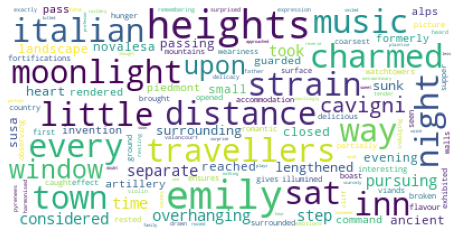

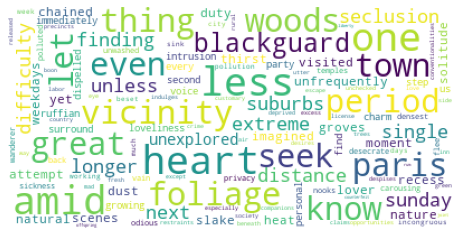

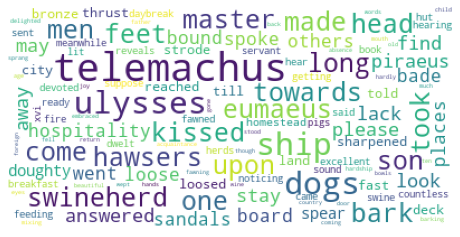

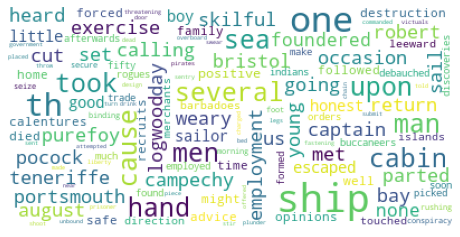

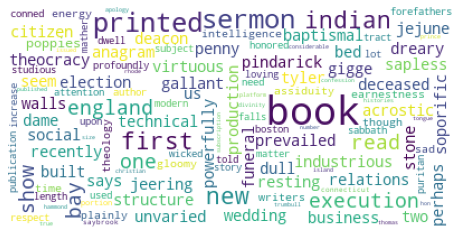

In [277]:
import wordcloud
dat =pd.DataFrame()
for i in range(5):
    
    dat=prepare_data(url[i],label[i])
    x=dat.iloc[:,0:1].to_numpy()
    
    wc = wordcloud.WordCloud(background_color='white', max_words=200, 
                             max_font_size=35)
    wc = wc.generate(x[0][0])
    fig = plt.figure(num=1)
    plt.axis('off')
    plt.imshow(wc, cmap=None)
    plt.show()

C:\Users\Nada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


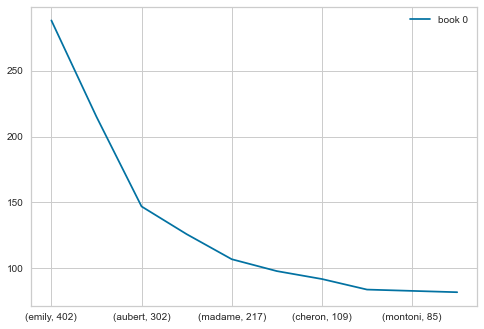

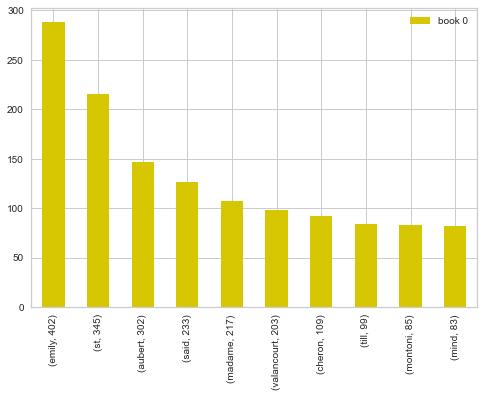

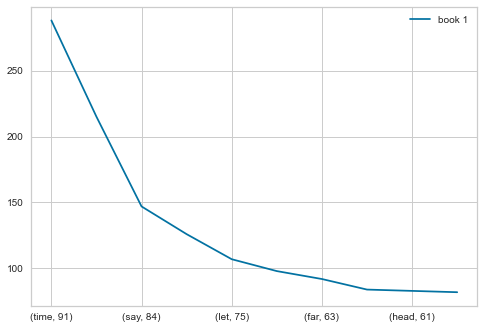

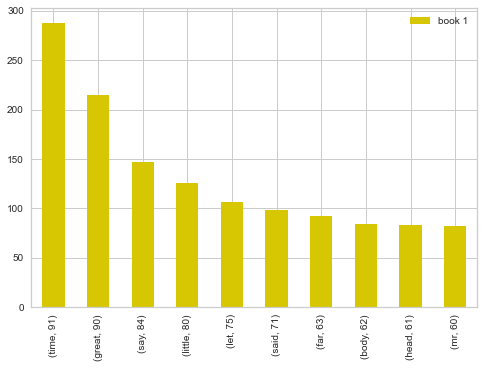

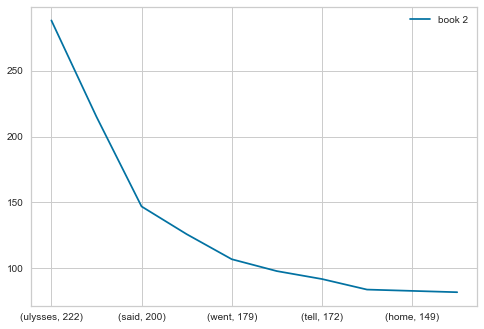

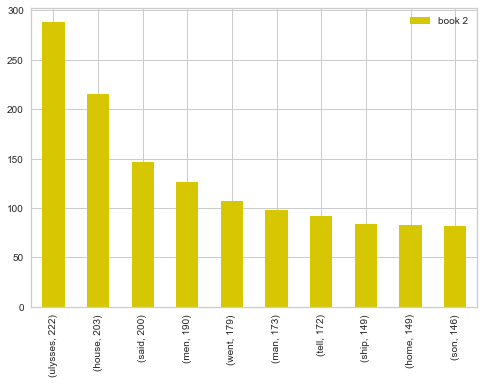

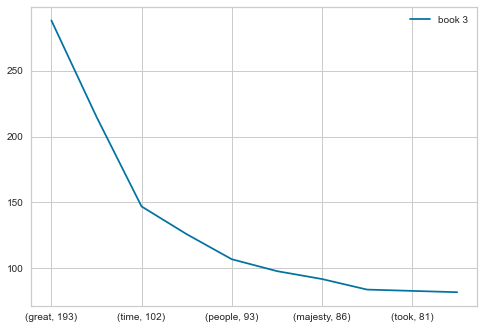

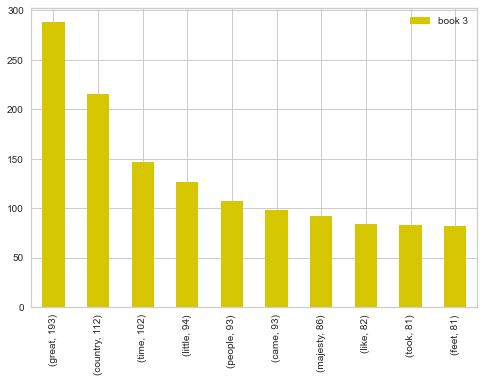

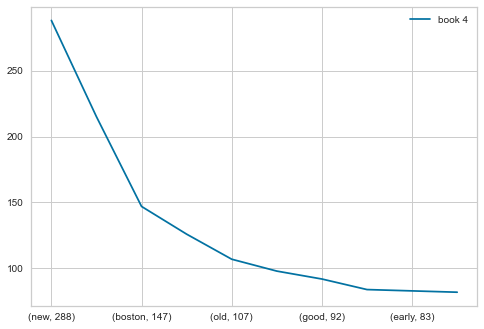

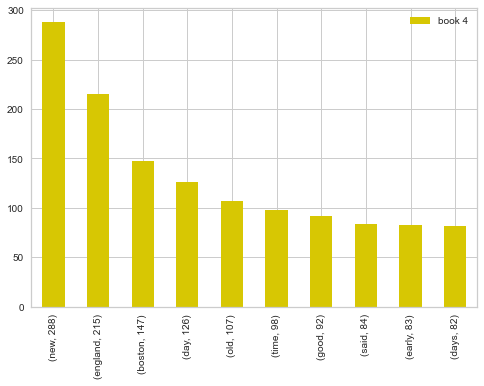

In [278]:
for i in range(5):
    dat=prepare_data(url[i],label[i])
    common_words = get_top_n_words(dat["partitions"], 10)
    df2=pd.DataFrame(common_words_book3,common_words,columns=['label',f'book {i}'])
    df2.plot()
    df2.plot.bar(stacked=True,color='y')
    